## Social Networks and Text Analysis
## Mini Project
## Student Number 700029965

### Taking all text files containing egdes and making network from it

In [5]:
#Importing libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections
import random
import numpy as np
from pylab import rcParams
import scipy as sp

#Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
#Get text file as graph file
#There are 10 such text files in the given dataset
df = pd.read_csv("sample2.txt",delim_whitespace=True,names=['N1','N2'])
df

,N1,N2
0,436,428
1,450,531
2,538,404
3,565,412
4,471,461
...,...,...
6379,397,389
6380,514,503
6381,527,412
6382,428,479


In [7]:
G=nx.Graph() #---> Create an empty undirected network 

m1 = list(df.N1)
m2 = list(df.N2)

G.add_nodes_from(m1) #---> Add nodes
G.add_nodes_from(m2)

df['edge'] = df[['N1','N2']].apply(tuple, axis=1)
df

,N1,N2,edge
0,436,428,"(436, 428)"
1,450,531,"(450, 531)"
2,538,404,"(538, 404)"
3,565,412,"(565, 412)"
4,471,461,"(471, 461)"
...,...,...,...
6379,397,389,"(397, 389)"
6380,514,503,"(514, 503)"
6381,527,412,"(527, 412)"
6382,428,479,"(428, 479)"


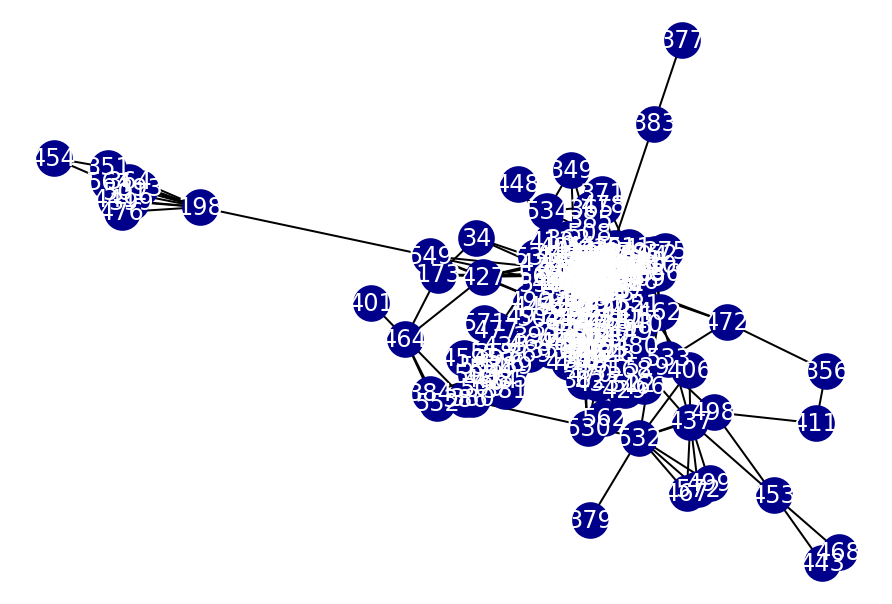

In [8]:
#Plotting the Network
edges=list(df['edge'])
edges

G.add_edges_from(edges) #---> Add the list of edges 
nx.draw(G, with_labels=True, node_color='darkblue', font_color='white') #---> Plot the network

In [9]:
#Calculate the Assortativity coefficient of the Network
#If it is positive then network is assortative else disassortative
r = nx.degree_assortativity_coefficient(G)
r

0.22269166051622497

In [10]:
#Find influencer node in the network and its value
b = dict(nx.eigenvector_centrality(G))
c=list(b.values())
d=max(c)
print(d)

for key, value in b.items():
    if value == d :
        print(key) 

0.16411517714095453
376


In [11]:
#Function to find shortest path in given 2 nodes
def short_path_plot(G,source,target):
    '''This function calculates the shortest path between two nodes in a network
    
    Attributes:
    G: The networkx object
    source: Name of the source node
    target: Name of the target node'''
    
    pos = nx.spring_layout(G) #<-- Set the layout of the network
    nx.draw_networkx_nodes(G,pos, node_size=50)
    nx.draw_networkx_edges(G,pos,alpha=0.1)
#     nx.draw(G,pos,node_color='k', with_labels=True, font_color='white') #<-- Plot the original network in black

    path = nx.shortest_path(G,source=source,target=target) #<-- Select the nodes in the shortest path
    print(path)
    path_edges = list(zip(path,path[1:])) #<-- Create a list of iterables with the edges of the shortest path
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r', label=True)  #<-- Plot the nodes
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=10)  #<-- Plot the edges
    nx.draw_networkx_labels(G,pos, labels=dict(zip(path,path)))
    plt.axis('off')
    plt.show()
    return

In [35]:
#Function for plotting the shortest path
def plot_long_shortest(G):
    short_path=[]
    for source in G.nodes:
        for target in G.nodes:
            short_path.append(list(nx.shortest_path(G,source,target)))
    short_path  

    my_dist = []        
    for j in short_path:
        my_dist.append(len(j))
    my_dist

    d=max(my_dist)
    print(d)

    l=[]
    for value in short_path:
        if len(value) == d :
            #print(value) 
            l.append(value)
    l  
    len(l[0])# This is the diameter
    
    return short_path_plot(G,l[0][0],l[0][9])

10
[454, 351, 198, 549, 412, 373, 498, 532, 386, 401]


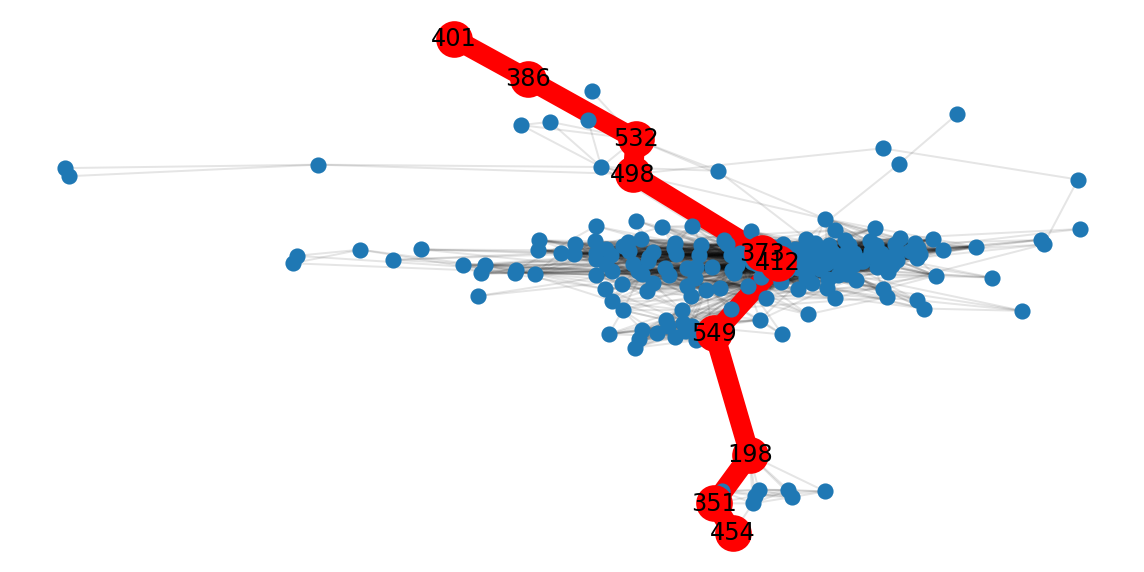

In [36]:
plot_long_shortest(G)

Degree sequence [99, 89, 88, 82, 78, 74, 73, 73, 73, 72, 72, 72, 71, 71, 69, 68, 66, 65, 65, 64, 64, 63, 63, 61, 61, 60, 60, 60, 59, 59, 57, 56, 56, 56, 55, 55, 54, 54, 54, 53, 53, 52, 52, 51, 51, 50, 50, 49, 49, 47, 46, 46, 46, 45, 45, 45, 44, 43, 42, 42, 42, 42, 42, 42, 41, 39, 39, 38, 38, 37, 37, 37, 36, 36, 36, 35, 34, 34, 33, 33, 33, 32, 32, 32, 31, 31, 31, 31, 31, 30, 30, 29, 29, 29, 29, 28, 27, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 24, 24, 24, 23, 22, 22, 22, 22, 22, 21, 21, 21, 21, 20, 20, 20, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 14, 14, 13, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Degree frequencies Counter({9: 9, 4: 8, 2: 8, 7: 7, 5: 7, 3: 7, 42: 6, 25: 6, 19: 6, 11: 6, 31: 5, 22: 5, 18: 5, 16: 5, 14: 5, 10: 5, 8: 5, 1: 5,

<BarContainer object of 73 artists>

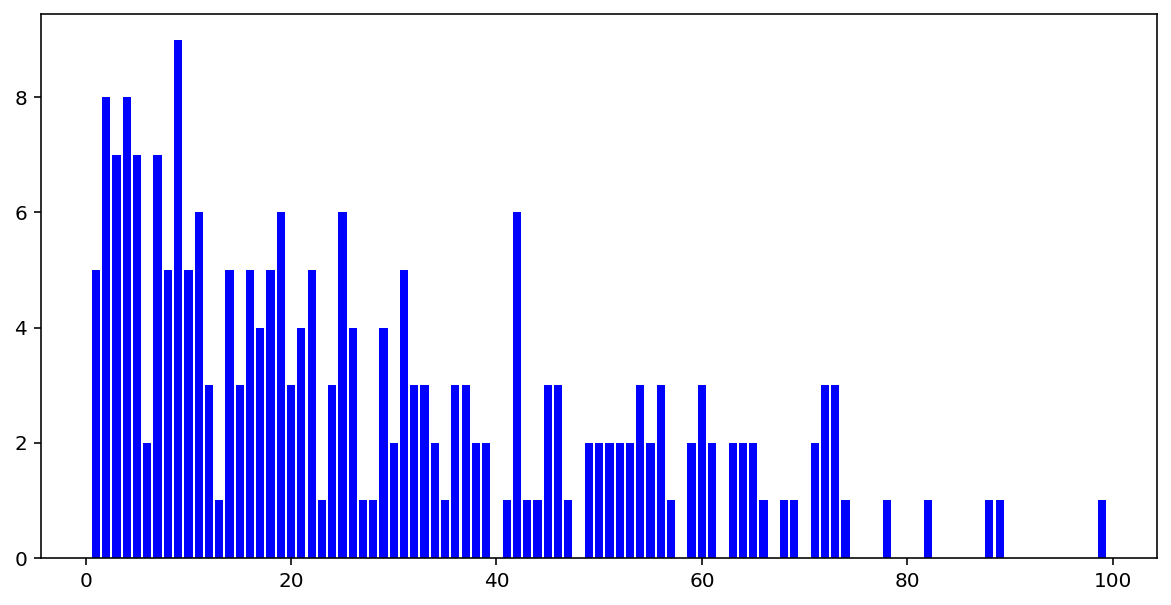

In [13]:
#Plot the degree sequence and its bar plot
import collections
%matplotlib inline

degree = sorted([d for n, d in G.degree()], reverse=True)
print("Degree sequence", degree)

degreeCount = collections.Counter(degree) #<-- Count the frequency (number of times) of each degree
print("Degree frequencies", degreeCount)

deg, cnt = zip(*degreeCount.items()) #<-- Function that create lists of iterables, 
                                     #one for the degrees and the other one for the frquencies

rcParams['figure.figsize'] = 10, 5 #<-- Set the plot size
fig, ax = plt.subplots() #<-- Create the subplots 

plt.bar(deg, cnt, width=0.80, color='blue') #<-- Plot a bar plot with the degrees and their frequencies

In [14]:
#To fit and compare distributions using powerlaw
data=list(degreeCount.values())
import powerlaw
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit
C:\Users\Wamika\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


(0.37987558489459206, 0.5929441497395584)

In [15]:
#Compare powerlaw with lognormal distribution
fit.distribution_compare('power_law', 'lognormal')

C:\Users\Wamika\anaconda3\lib\site-packages\powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


(-0.3268776229422128, 0.0010567767236510065)

Text(0, 0.5, 'node idx')

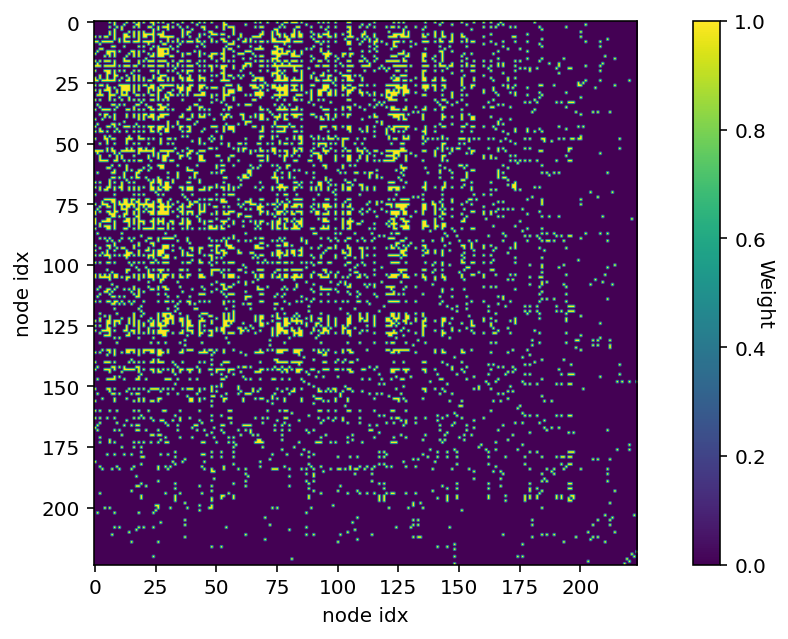

In [16]:
#Plot the adjacency matrix of the graph
plt.imshow(nx.to_numpy_matrix(G)) #--> This function create a heatmaps from 2-dimensional numpy arrays.
cbar = plt.colorbar() #--> set the colorbar of the heatmap

cbar.set_label('Weight', rotation=270) #--> set the label of the color bar and rotate it
plt.xlabel('node idx') #--> set the label of the x axis
plt.ylabel('node idx') #--> set the label of the y axis

In [17]:
#Function to plot ego network of the graph to understand which nodes are at distances 1,2,3,.. etc from the influencial node 
#so that information is spread to those nodes using Independent cascade and other models

def Draw_ego_network(G,layout,node_id,max_dist):
    eg=nx.ego_graph(G,node_id)
    my_list=dict(eg.degree)
    my_list
    length = dict(nx.all_pairs_shortest_path_length(G,cutoff=max_dist))
    l=length[node_id]
    clusters=np.array(list(set(l.values())))

    import matplotlib.colors as mcolors
    pos1 = nx.spring_layout(G)
    layout=layout

    pos = dict(zip(layout, pos1.values()))

    nodes = nx.draw_networkx_nodes(G,pos,node_size=50,node_color=list(l.values()),nodelist=list(l.keys()),cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)))
    nx.draw_networkx_edges(G,pos, alpha = 0.1)

    cb = plt.colorbar(nodes,ticks=range(0,len(clusters)), label='Communities')
    cb.ax.tick_params(length=0)
    # Adds the community labels to the colour bar
    cb.set_ticklabels(list(set(l.values())))


    nodes.set_clim(-0.5, len(clusters)-0.5)

    # Show the plot without the x/y axis
    plt.axis('off')
    plt.show()

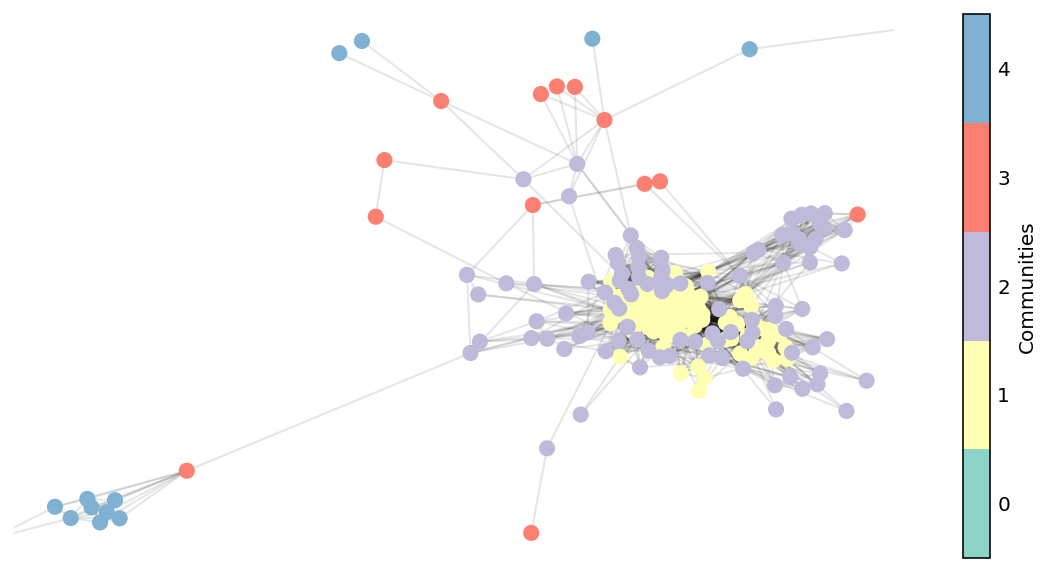

In [18]:
#Influencial node is taken as 376 and distance as 4
Draw_ego_network(G,nx.spring_layout(G),376,4)

## The influencial node is 376. We have plotted different nodes which are at distances 1,2,3 etc from that node with different colors.

## Function similar to SI model in Epidemics

In [37]:
#Function for our main model
#It is similar to SI model epidemics function
#Infected here means those nodes carry information for advertising
from networkx import nx
import matplotlib.pyplot as plt
import random as rd
import numpy as mp

def SI_model(G,initial_infected,beta,t_simulation):

    initialInfected = initial_infected
    population = len(G.nodes()) 
    beta = beta # information spread rate

    sNodes = []  # Initial nodes carrying information, Innovators
    infectedNodes = []  # Nodes getting information, Imitators
    initial_time = []  # time data (0 to time)
    time = t_simulation  # # of iterations for simulation

    def getInfected(graph):
        return [x for x,y in graph.nodes(data=True) if y['infected'] == 1]
    def getNeighbors(graph, givenNode):
        return [x for x in graph.neighbors(givenNode)]

    my_graph = G

    # accessing nodes
    nodes = my_graph.nodes()

    # setting initial conditions
    for node in nodes:
        if node in initialInfected:
            my_graph.nodes[node]['infected'] = True
        else:
            my_graph.nodes[node]['infected'] = False

    for t in range(time):
        # adding the time t
        initial_time.append(t)

        # infecting nodes
        infected = getInfected(my_graph)
        for j in infected:
            neighbors = getNeighbors(my_graph, j)
            for n in neighbors:
                rand = rd.random()
                if rand <= beta:
                    my_graph.nodes[n]['infected'] = True

        # recording s(t), x(t), r(t)
        infected = getInfected(my_graph)
        infectedNodes.append(len(infected))
        sNodes.append(population - len(infected))
   # print(infected)

    time=t_simulation
    initial_time=[]
    for t in range(time):
        # adding the time t
        initial_time.append(t)

    # plotting data
    plt.plot(initial_time, sNodes, label="Initial_Info")
    plt.plot(initial_time, infectedNodes, label="Diffusion_Info")
    plt.legend()
    plt.show()

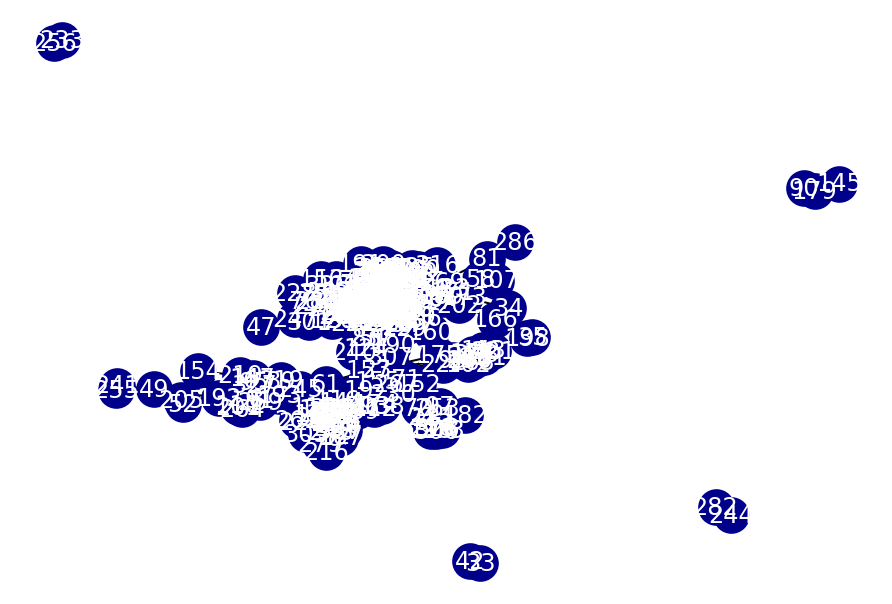

In [64]:
#Use of this model on first network in our dataset
df = pd.read_csv("sample.txt",delim_whitespace=True,names=['N1','N2'])
G1=nx.Graph() #---> Create an empty undirected network 

m1 = list(df.N1)
m2 = list(df.N2)

G1.add_nodes_from(m1) #---> Add nodes
G1.add_nodes_from(m2)

df['edge'] = df[['N1','N2']].apply(tuple, axis=1)
#Plotting the Network
edges1=list(df['edge'])
edges1

G1.add_edges_from(edges1) #---> Add the list of edges 
nx.draw(G1, with_labels=True, node_color='darkblue', font_color='white') #---> Plot the network

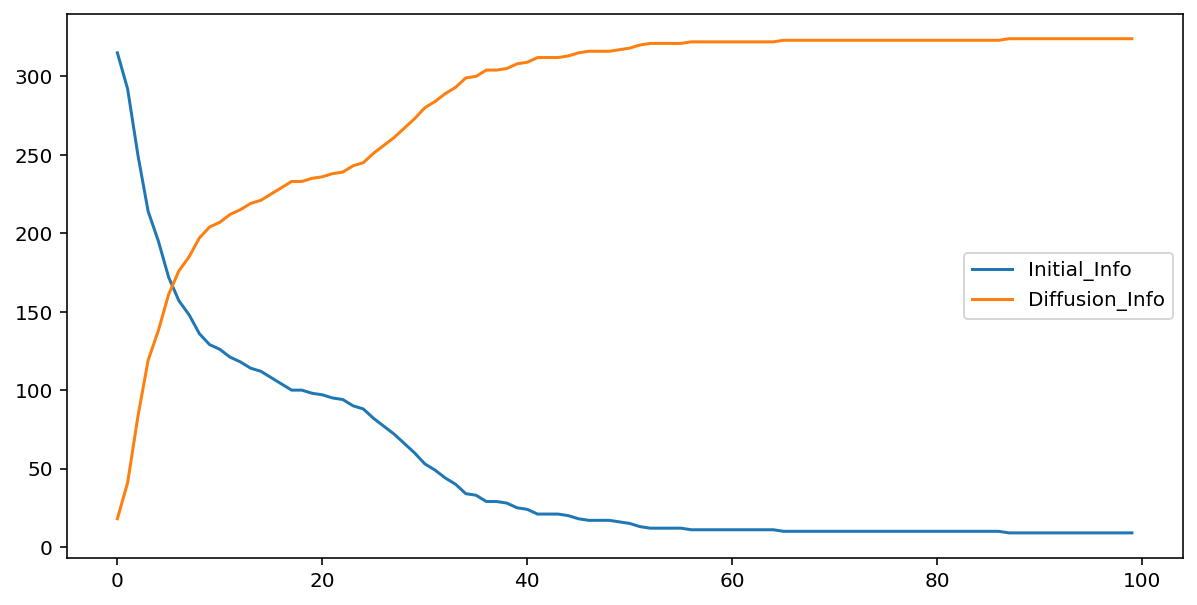

In [43]:
SI_model(G1,[271,98,291,100,40,50],0.05,100)
#We can see after around day 60, it is reaching towards staedy state

## Function for Bass Model

In [46]:
#Bass Model Function
import numpy as np

def get_bass_model(p, q, M, period = 30):

    """
    Create a discrete bass model, given p, q & M.
    Return the new and cumulative adoptions. We provide a period argument,
    to indicate the number of time periods we want our bass model to be computed
    till. It is not inclusive of the last time period.
    """

    # Initializing the arrays
    A = [0] * period
    R = [0] * period
    F = [0] * period
    N = [0] * period

    # One important thing to note, is that the time period we start from is t = 0.
    # In many articles, you will see time starting from t = 1. They are both the
    # same for all intents and purposes. Starting with t = 0 makes life easier in
    # python, as indexing in python starts from 0 too.

    # We start with A(0) =0, and build up the values for t = 0 from the equations
    # formulated
    A[0] = 0
    R[0] = M
    F[0] = p
    N[0] = M*p

    # Recursion starts from next time step
    t = 1

    # Creating a helper function for recursion
    def get_bass_model_helper(A, R, F, N, t):

        # If we have reached the final period, return the values
        if t == period:
            return N, F, R, A
        else:

            # Else, just compute the values for t
            A[t] = N[t-1] + A[t-1]
            R[t] = M - A[t]
            F[t] = p + q * A[t]/M
            N[t] = F[t] * R[t]

            # compute values for the next time step
            return get_bass_model_helper(A, R, F, N, t+1)

    N, F, R, A = get_bass_model_helper(A, R, F, N, t)
    a=np.array(N)
    b=np.array(A)
    
    time=30
    initial_time=[]
    for t in range(time):
        # adding the time t
        initial_time.append(t)
    
    
    

    # plotting data
    plt.plot(initial_time,a, label="S")
    plt.plot(initial_time,b, label="I")
    plt.legend()
    plt.show()
    
    # Converting to numpy arrays and returning.
    return a,b

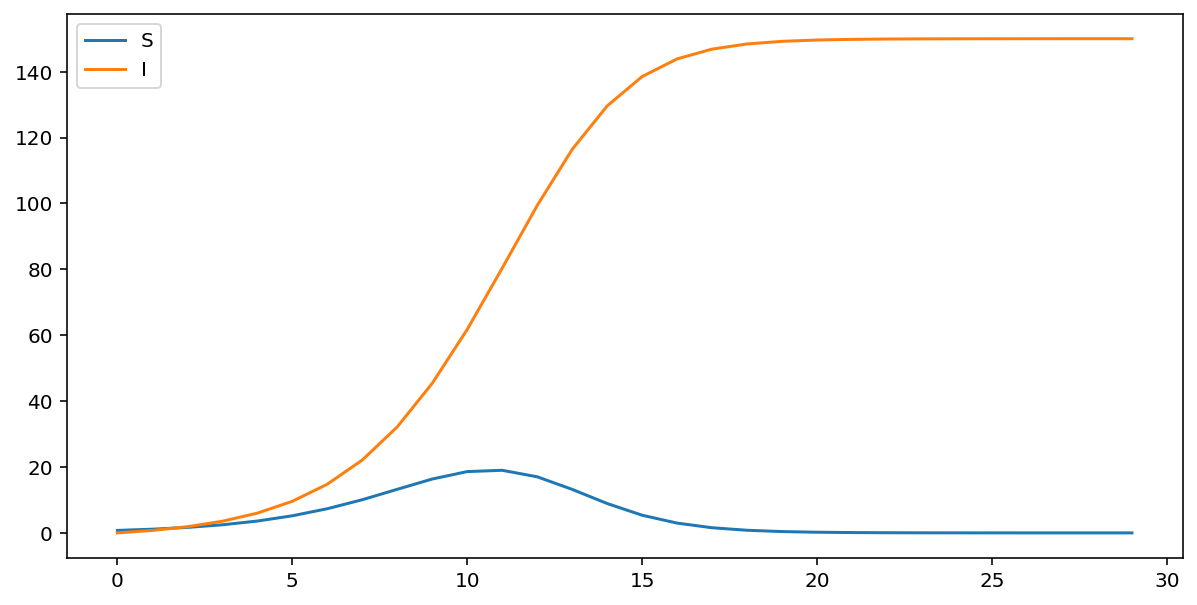

(array([7.50000000e-01, 1.11937500e+00, 1.66369208e+00, 2.45725966e+00,
        3.59559836e+00, 5.18873306e+00, 7.33582071e+00, 1.00651095e+01,
        1.32260213e+01, 1.63527762e+01, 1.86064071e+01, 1.90024024e+01,
        1.70246331e+01, 1.32082197e+01, 8.91625820e+00, 5.36139496e+00,
        2.96867574e+00, 1.56136434e+00, 7.97617151e-01, 4.01187868e-01,
        2.00187524e-01, 9.94896760e-02, 4.93452353e-02, 2.44499403e-02,
        1.21086220e-02, 5.99521505e-03, 2.96798617e-03, 1.46924008e-03,
        7.27295144e-04, 3.60016316e-04]),
 array([  0.        ,   0.75      ,   1.869375  ,   3.53306708,
          5.99032674,   9.5859251 ,  14.77465816,  22.11047887,
         32.17558832,  45.4016096 ,  61.75438583,  80.36079292,
         99.36319529, 116.38782836, 129.5960481 , 138.5123063 ,
        143.87370126, 146.842377  , 148.40374134, 149.20135849,
        149.60254636, 149.80273388, 149.90222356, 149.95156879,
        149.97601873, 149.98812736, 149.99412257, 149.99709056,
      

In [47]:
#We take parameters as p=0.005, q=0.5, M=150, time=30
get_bass_model(0.005, 0.5, 150, period = 30)

## Function for product Diffusion

In [48]:
# This function simulates the product adoption over time in the Market with the inclusion of imitators and influential.
#     Parameters:
#         rIn, rIm: it is the chance of product adoption by the non-adopters in both cases of influenitals and imitators.
#         sIn, sIm - it measures the interaction between adopters and non-adopters in both case of influentials and imitators.
#         weeks: no of weeks
#         dt: the small time difference.
#         inSize: population of influentials
#         imSize: population of imitators
#         weight: measures the extent in which non-adopters impress adopters
#     Return Values:
#         timeList: The list of time for plotting X-Axis.
#         aList: the list with the adoopters
#         rList: the list with rate of changes
#         totalList: the list of total
#         Inlist1: the list of rate of changes of influentials
#         ImList1: the list of rate of changes of imitators

In [49]:
import matplotlib.pyplot as pyplot
def productDiffusion2(inSize, imSize, rIn, sIn, rIm, sIm, weight, weeks, dt):
        InList = []
        ImList = []
        totalList= []
        timeList = []

        influenced_adopters_Before= 0
        imitated_adopters_Before = 0
        total_adopters_Before = 0
        t = 0
        InList.append(influenced_adopters_Before)
        ImList.append(imitated_adopters_Before)
        totalList.append(total_adopters_Before)
        timeList.append(t)
        InList1 = [0]
        ImList1 = [0]
        totalList1 = [0]

        for i in range(0, int(weeks/dt)+1):
            newly_influenced = InList[-1]+ rIn*(1 - InList[-1])*dt + sIn * InList[-1] *(1 - InList[-1])*dt   #differential equations for newly influenced
            InList.append(newly_influenced)
            newly_imitated = ImList[-1] + rIm*(1 - ImList[-1])*dt + weight * sIm * InList[-1] * (1 - ImList[-1])*dt + (1 - weight) * sIm * ImList[-1] * (1 - ImList[-1])*dt
            ImList.append(newly_imitated)

            t = t+dt
            timeList.append(t)

            total_new_influenced = (newly_influenced - influenced_adopters_Before)/dt
            InList1.append(total_new_influenced)

            total_new_imitated = (newly_imitated - imitated_adopters_Before)/dt
            ImList1.append(total_new_imitated)

            total_new_adoptions = ((newly_influenced) + (newly_imitated))
            totalList.append(total_new_adoptions)
            total_adoptions = (total_new_adoptions - total_adopters_Before)/dt
            totalList1.append(total_adoptions)

            influenced_adopters_Before = newly_influenced
            imitated_adopters_Before = newly_imitated
            total_adopters_Before = total_new_adoptions

        for i in range(len(InList)):                                          # second loop to change fraction into percentage
            InList[i] = InList[i] * inSize
            InList1[i] = InList1[i] * inSize
            ImList[i] = ImList[i] * imSize
            ImList1[i] = ImList1[i] * imSize
            totalList1[i] = InList1[i] + ImList1[i]
            totalList[i] = InList[i] + ImList[i]
        return InList, ImList, InList1, ImList1,timeList, totalList, totalList1         #returns the lists

In [50]:
def main():
    inSize = 100
    imSize = 50
    rIn = 0.05 #(similar to p value)
    sIn = 1.03
    rIm = 0.05 #(similar to q value)
    sIm = 0.8
    weight = 0.6
    weeks = 15
    dt = 0.01
    InList, ImList, InList1, ImList1, timeList,totalList,totalList1= productDiffusion2(inSize, imSize, rIn, sIn, rIm, sIm, weight, weeks, dt)
    pyplot.figure(1)                                                                 #plots the figure 1
    pyplot.plot(timeList, InList, label = 'Influencers')
    pyplot.plot(timeList, ImList, label = 'Imitators')
    pyplot.plot(timeList, totalList, label = 'Total')
    pyplot.xlabel('Weeks')
    pyplot.ylabel('Market Adoption Numbers')
    pyplot.legend()
    
    pyplot.figure(2)                                                                   #plots the figure 2
    pyplot.plot(timeList, InList1, label = 'Influencers')
    pyplot.plot(timeList, ImList1, label = 'Imitators')
    pyplot.plot(timeList, totalList1, label = 'Total')
    pyplot.xlabel('Weeks')
    pyplot.ylabel('Marginal Market Adoption Numbers')
    pyplot.legend()
    pyplot.show()

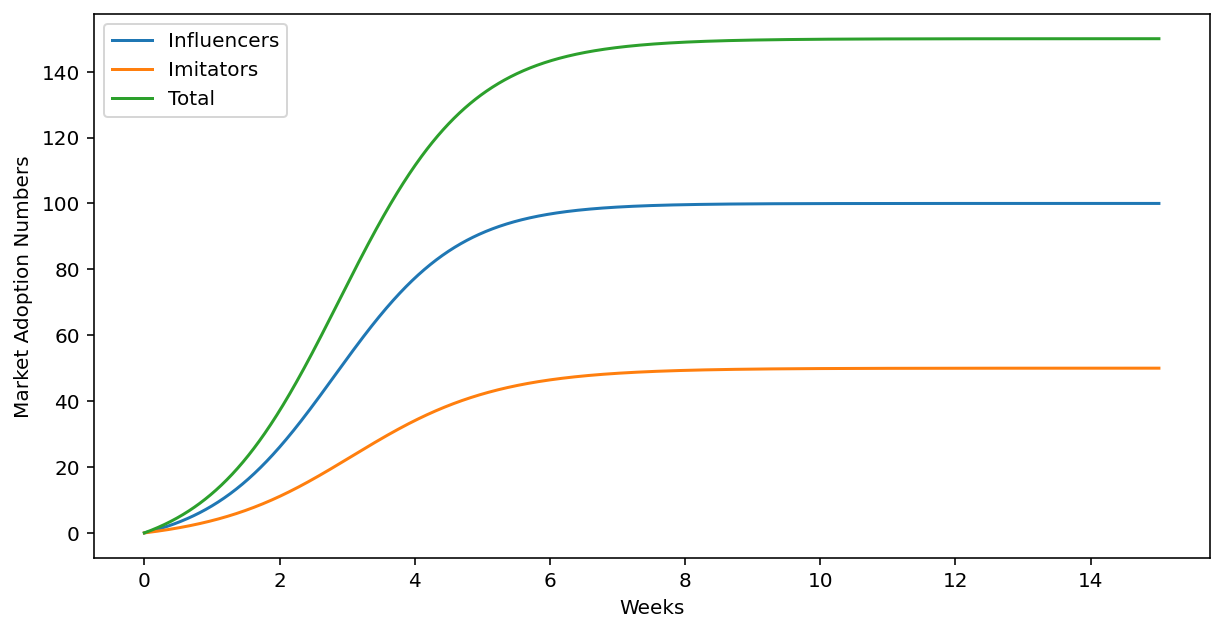

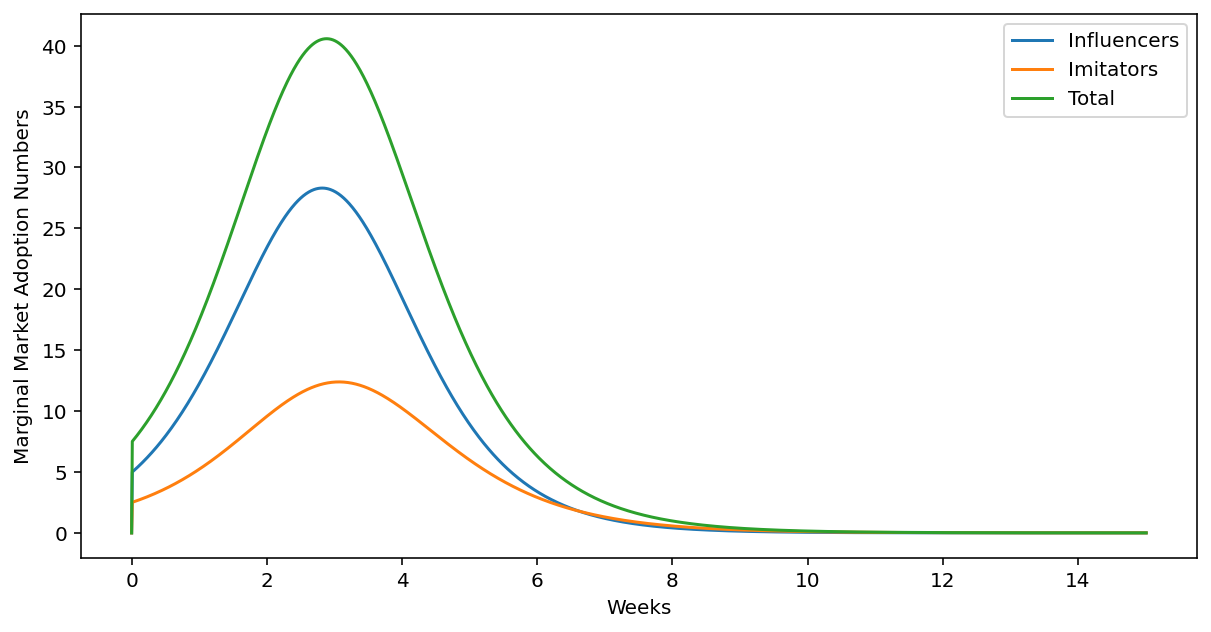

In [51]:
main()

## Experiment comparing Greedy and CELF methods to solve Influence Maximization Problem

In [57]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform, seed
import numpy as np
import time
from igraph import *
! pip install python-igraph

In [58]:
def IC(g,S,p=0.5,mc=1000):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    
    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(mc):
        
        # Simulate propagation process      
        new_active, A = S[:], S[:]
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:
                
                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len(g.neighbors(node))) < p
                new_ones += list(np.extract(success, g.neighbors(node)))

            new_active = list(set(new_ones) - set(A))
            
            # Add newly activated nodes to the set of activated nodes
            A += new_active
            
        spread.append(len(A))
        
    return(np.mean(spread))

In [70]:
def greedy(g,k,p=0.1,mc=1000):
    """
    Input:  graph object, number of seed nodes
    Output: optimal seed set, resulting spread, time for each iteration
    """

    S, spread, timelapse, start_time = [], [], [], time.time()
    
    # Find k nodes with largest marginal gain
    for _ in range(k):

        # Loop over nodes that are not yet in seed set to find biggest marginal gain
        best_spread = 0
        for j in set(range(g.vcount()))-set(S):

            # Get the spread
            s = IC(g,S + [j],p,mc)

            # Update the winning node and spread so far
            if s > best_spread:
                best_spread, node = s, j

        # Add the selected node to the seed set
        S.append(node)
        
        # Add estimated spread and elapsed time
        spread.append(best_spread)
        timelapse.append(time.time() - start_time)

    return(S,spread,timelapse)

In [66]:
#Take our network in ipython module format to run above functions
import igraph
from igraph import *
g = Graph()
g.add_vertices(400)
g.add_edges(edges1)

In [68]:
# Run algorithm CELF
#value of k is 5 and number of monte carlo simulations is 100
celf_output   = celf(g,5,p = 0.1,mc = 100)
print("celf output:   " + str(celf_output[0]))

celf output:   [25, 115, 227, 4, 89]


In [71]:
# Run algorithm Greedy
#value of k is 5 and number of monte carlo simulations is 100
greedy_output = greedy(g,5,p = 0.1,mc = 100)
print("greedy output: " + str(greedy_output[0]))

greedy output: [25, 115, 227, 4, 89]
